
Análise do Dataset NPS - TOVS Challenge

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações para melhor visualização
plt.style.use('seaborn')
sns.set(font_scale=1.2)

In [3]:
# Carregar os dados simplificado para fins didáticos (O projeto Original fica no workspace Cloud do Fabric)
df = pd.read_csv('customer_survey_data.csv')

# Exibir as primeiras linhas do DataFrame
print(df.head())

# Informações gerais sobre o DataFrame
print(df.info())

# Estatísticas descritivas
print(df.describe())

     ID Market Survey date    Customer Name  Month  Quarter  NPS
0  1000     US  01/09/2021  Krista Richards      9        3   10
1  1001    MEX  07/11/2021      Monica King     11        4    9
2  1002     UK  25/12/2021  Ricky Armstrong     12        4    0
3  1003     UK  01/10/2021     Andrea Foley     10        4   10
4  1004     UK  01/03/2021     Jerry Garcia      3        1    8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             5000 non-null   int64 
 1   Market         5000 non-null   object
 2   Survey date    5000 non-null   object
 3   Customer Name  5000 non-null   object
 4   Month          5000 non-null   int64 
 5   Quarter        5000 non-null   int64 
 6   NPS            5000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 273.6+ KB
None
                ID        Month      Quarter         NPS
cou

ID               0
Market           0
Survey date      0
Customer Name    0
Month            0
Quarter          0
NPS              0
dtype: int64


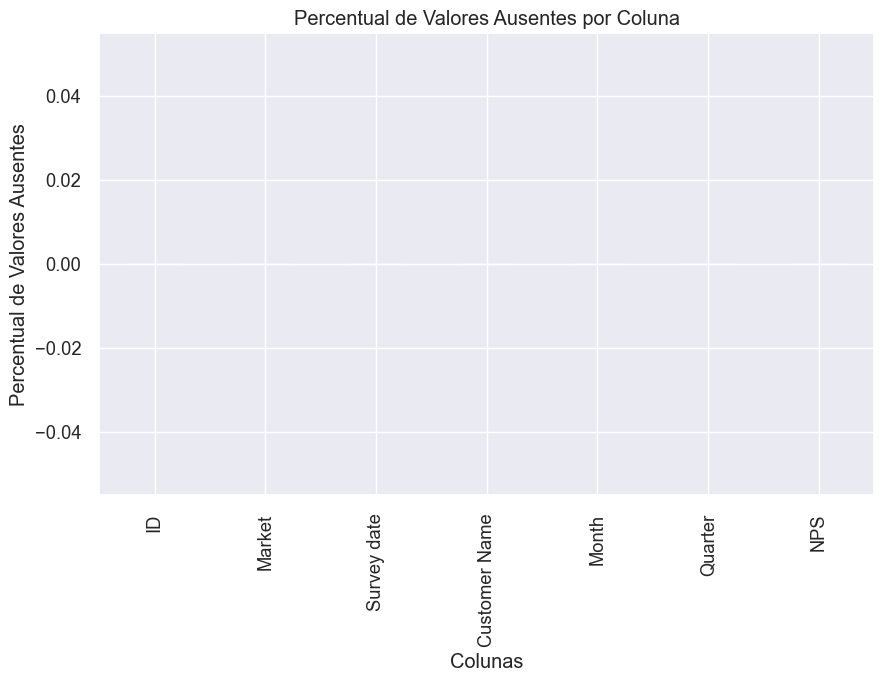

In [4]:
"""

A análise de valores ausentes é crucial para entender a qualidade dos dados. Valores ausentes podem impactar significativamente as análises subsequentes e podem precisar de tratamento especial (como imputação ou remoção).

"""

# Verificar valores ausentes
missing_values = df.isnull().sum()
print(missing_values)

# Visualizar percentual de valores ausentes
plt.figure(figsize=(10, 6))
missing_values_pct = (missing_values / len(df)) * 100
missing_values_pct.plot(kind='bar')
plt.title('Percentual de Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Valores Ausentes')
plt.show()

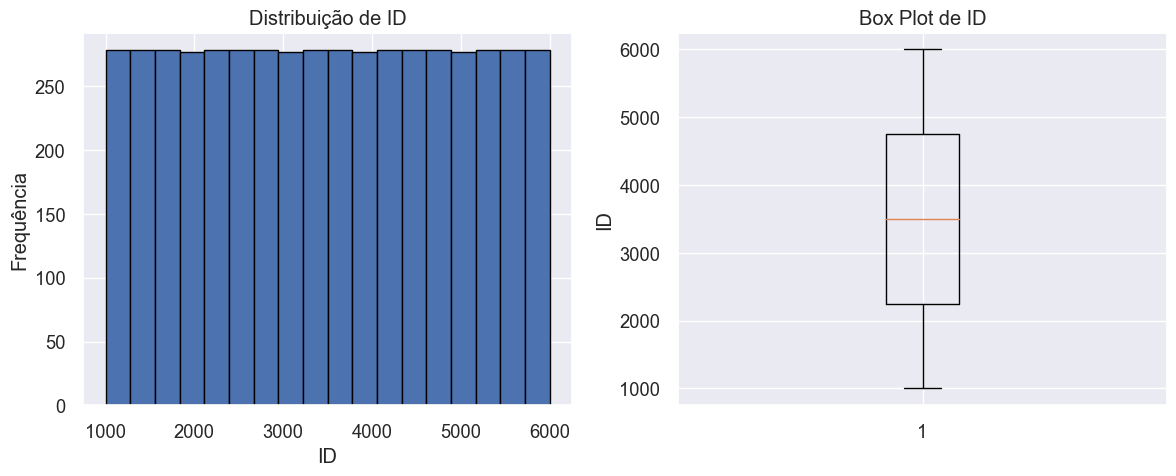

Teste de normalidade para ID: p-value = 0.0


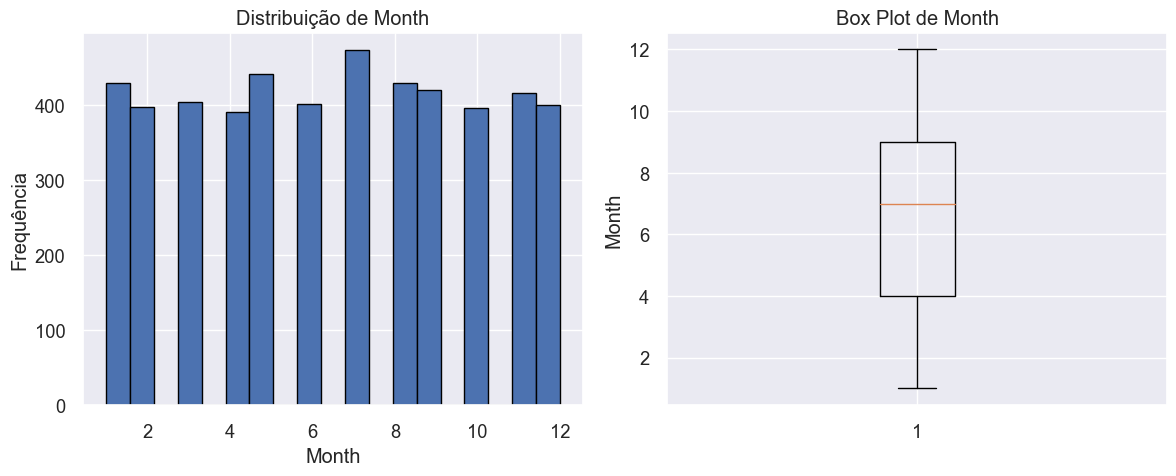

Teste de normalidade para Month: p-value = 0.0


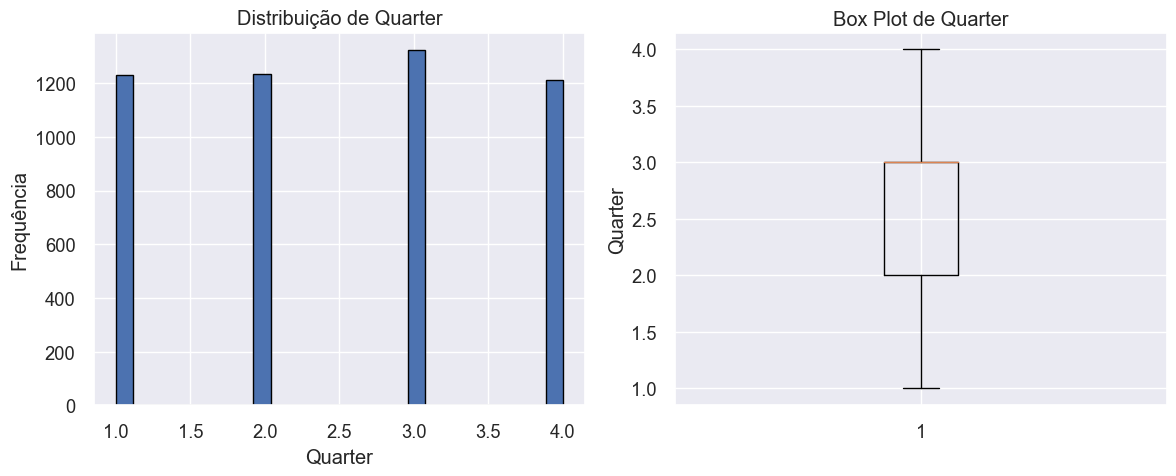

Teste de normalidade para Quarter: p-value = 0.0


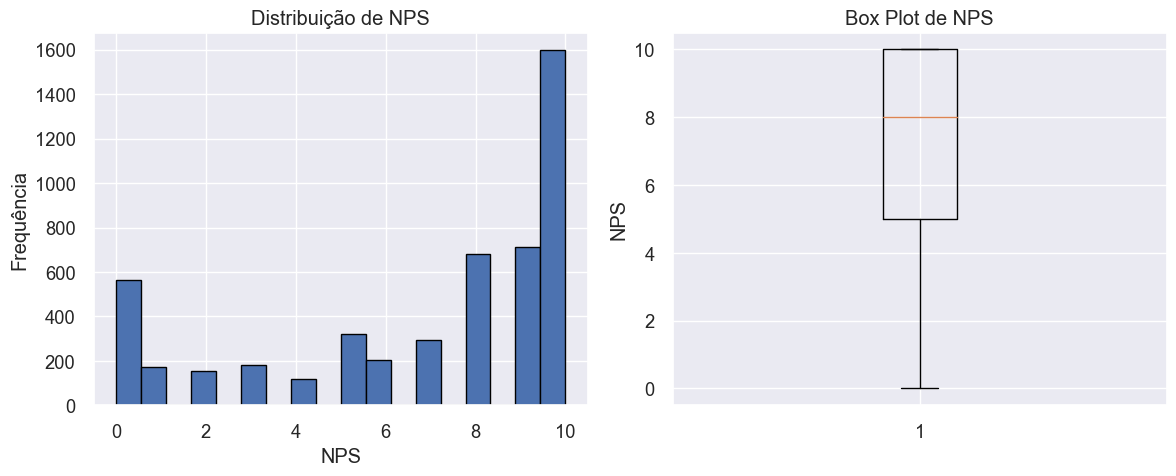

Teste de normalidade para NPS: p-value = 1.9373194188609893e-152


In [11]:
"""

A análise da distribuição das variáveis numéricas nos ajuda a entender a natureza dos dados. Histogramas mostram a forma da distribuição, enquanto box plots revelam a presença de outliers.

O teste de normalidade (como o teste de D'Agostino e Pearson) nos diz se a distribuição se aproxima de uma normal.

"""


numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(12, 5))
    
    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(df[col].dropna(), bins='auto', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col].dropna())
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
    # Teste de normalidade
    _, p_value = stats.normaltest(df[col].dropna())
    print(f"Teste de normalidade para {col}: p-value = {p_value}")

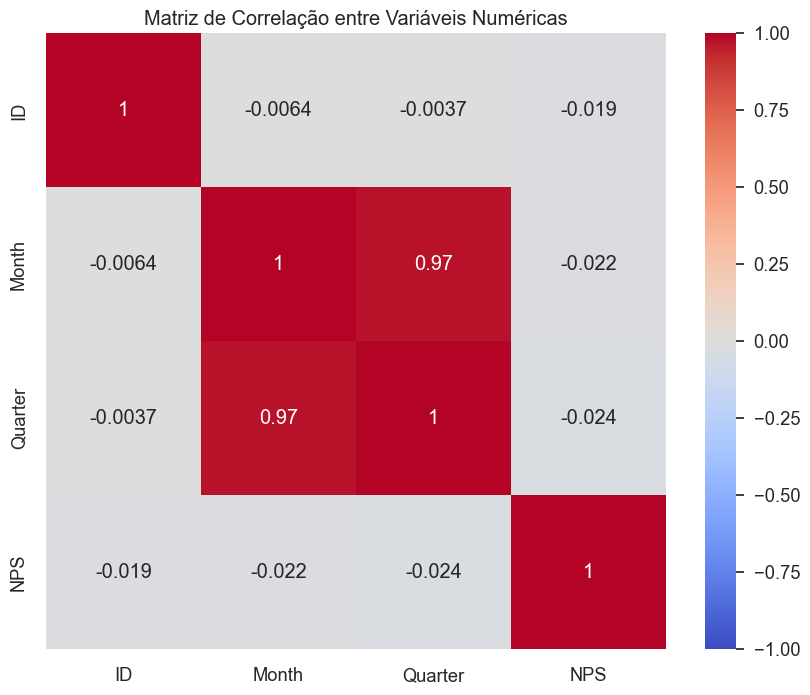

               ID     Month   Quarter       NPS
ID       1.000000 -0.006390 -0.003723 -0.019206
Month   -0.006390  1.000000  0.971330 -0.021879
Quarter -0.003723  0.971330  1.000000 -0.024380
NPS     -0.019206 -0.021879 -0.024380  1.000000


In [8]:
"""

Explicação:

A correlação varia de -1 a 1.
1 indica uma forte correlação positiva.
-1 indica uma forte correlação negativa.
0 indica nenhuma correlação linear.
O mapa de calor usa cores para representar visualmente essas correlações.

"""

# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calcular a matriz de correlação
corr_matrix = df[numeric_columns].corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Imprimir a matriz de correlação
print(corr_matrix)

c:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


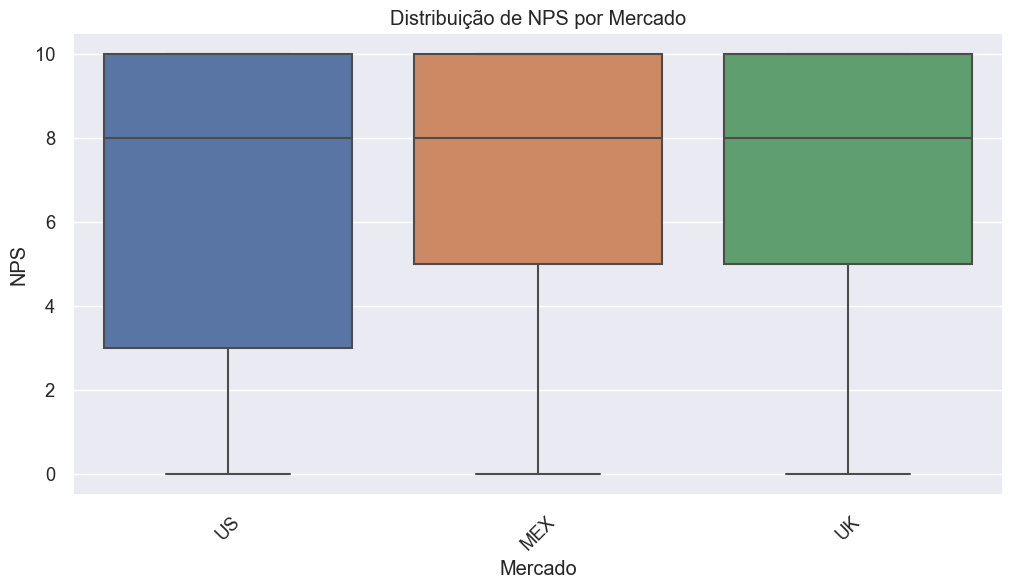

Estatísticas descritivas de NPS por Mercado:
         count      mean       std  min  25%  50%   75%   max
Market                                                       
MEX     1649.0  6.939964  3.511169  0.0  5.0  8.0  10.0  10.0
UK      1720.0  6.988953  3.227355  0.0  5.0  8.0  10.0  10.0
US      1631.0  6.585530  3.722409  0.0  3.0  8.0  10.0  10.0

Resultado do teste ANOVA:
F-statistic: 6.584351697876397
p-value: 0.0013938424858577756


c:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\luish\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


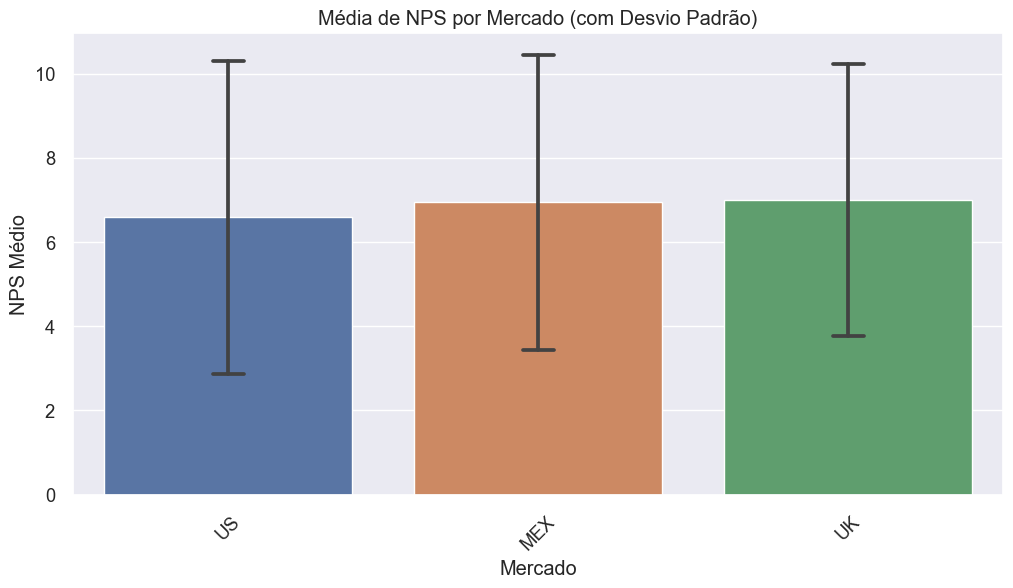

In [10]:
"""
Esta análise nos ajudará a entender como o NPS (Net Promoter Score) varia entre os diferentes mercados. 
"""

# 1. Visualização: Box plot de NPS por Mercado
plt.figure(figsize=(12, 6))
sns.boxplot(x='Market', y='NPS', data=df)
plt.title('Distribuição de NPS por Mercado')
plt.xlabel('Mercado')
plt.ylabel('NPS')
plt.xticks(rotation=45)
plt.show()

# 2. Estatísticas descritivas por Mercado
market_stats = df.groupby('Market')['NPS'].describe()
print("Estatísticas descritivas de NPS por Mercado:")
print(market_stats)

# 3. Teste ANOVA para diferença significativa entre mercados
markets = df['Market'].unique()
nps_by_market = [df[df['Market'] == market]['NPS'] for market in markets]
f_statistic, p_value = stats.f_oneway(*nps_by_market)
print(f"\nResultado do teste ANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# 4. Visualização: Gráfico de barras com média e erro padrão
plt.figure(figsize=(12, 6))
sns.barplot(x='Market', y='NPS', data=df, ci='sd', capsize=0.1)
plt.title('Média de NPS por Mercado (com Desvio Padrão)')
plt.xlabel('Mercado')
plt.ylabel('NPS Médio')
plt.xticks(rotation=45)
plt.show()

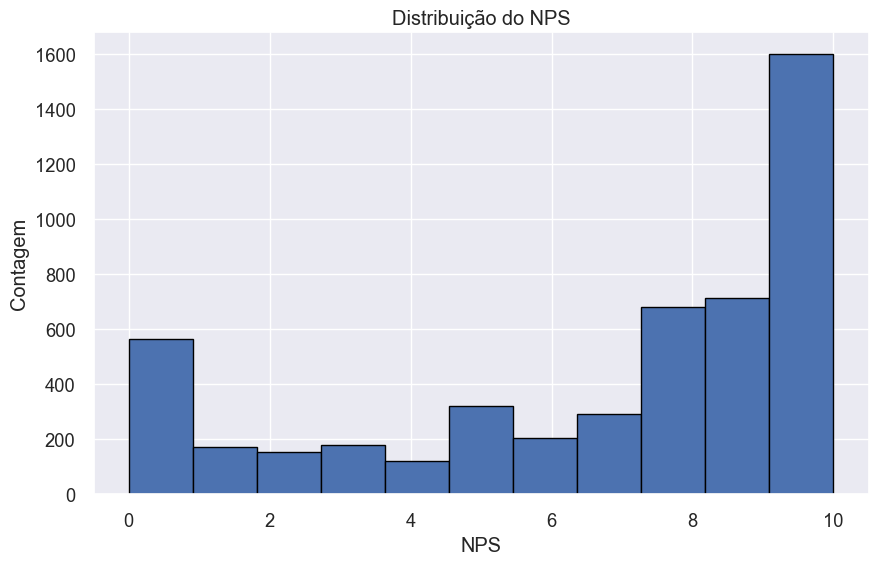

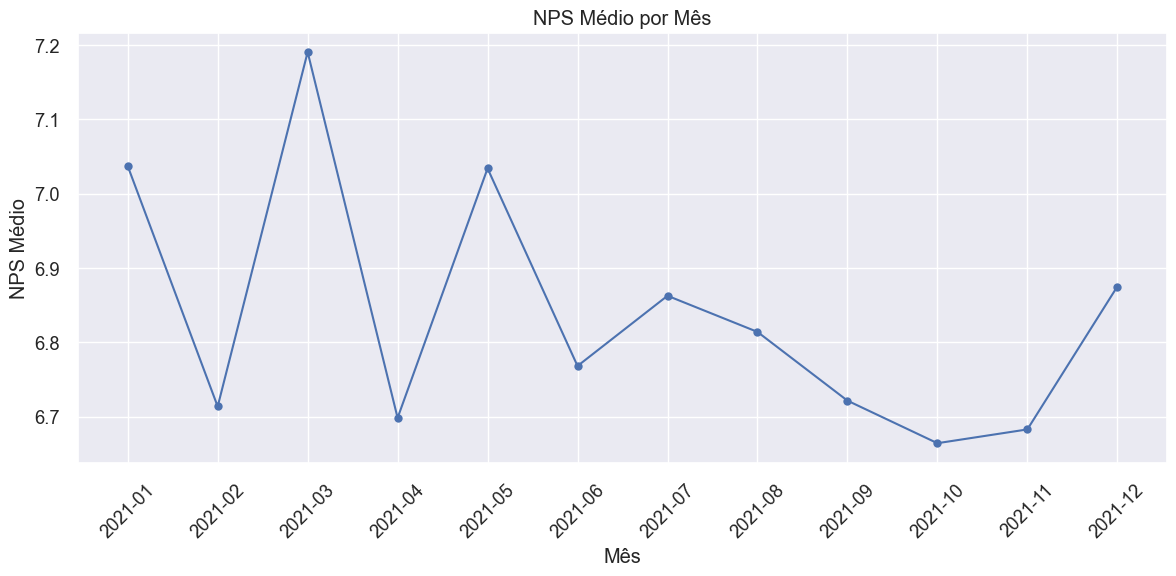

Top 5 dias com maior NPS:
     Survey date  NPS
82    2021-01-01   10
1200  2021-01-01   10
485   2021-01-01   10
2298  2021-01-01   10
356   2021-01-01   10

Top 5 dias com menor NPS:
     Survey date  NPS
1819  2021-01-01    0
3989  2021-01-03    0
740   2021-01-04    0
3183  2021-01-05    0
1067  2021-01-05    0


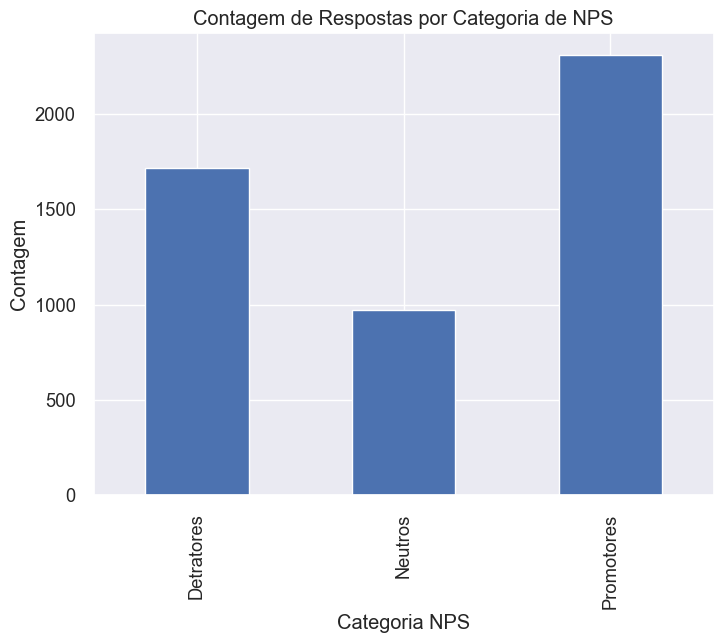

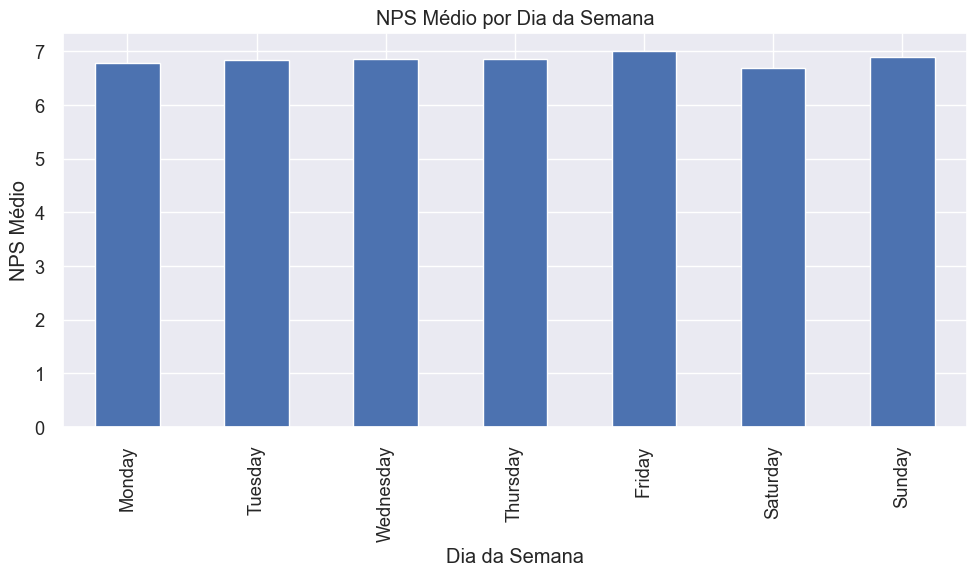

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt


# 1. Distribuição geral do NPS
plt.figure(figsize=(10, 6))
plt.hist(df['NPS'], bins=11, edgecolor='black')
plt.title('Distribuição do NPS')
plt.xlabel('NPS')
plt.ylabel('Contagem')
plt.show()

# 2. NPS médio por mês
df['Month'] = df['Survey date'].dt.to_period('M')
monthly_nps = df.groupby('Month')['NPS'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_nps)), monthly_nps['NPS'], marker='o')
plt.title('NPS Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('NPS Médio')
plt.xticks(range(len(monthly_nps)), monthly_nps['Month'].astype(str), rotation=45)
plt.tight_layout()
plt.show()

# 3. Top 5 dias com maior e menor NPS
top_5_high = df.nlargest(5, 'NPS')[['Survey date', 'NPS']]
top_5_low = df.nsmallest(5, 'NPS')[['Survey date', 'NPS']]
print("Top 5 dias com maior NPS:")
print(top_5_high)
print("\nTop 5 dias com menor NPS:")
print(top_5_low)

# 4. Contagem de respostas por categoria de NPS
df['NPS_Category'] = pd.cut(df['NPS'], bins=[-1, 6, 8, 10], labels=['Detratores', 'Neutros', 'Promotores'])
nps_counts = df['NPS_Category'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
nps_counts.plot(kind='bar')
plt.title('Contagem de Respostas por Categoria de NPS')
plt.xlabel('Categoria NPS')
plt.ylabel('Contagem')
plt.show()

# 5. NPS médio por dia da semana
df['Weekday'] = df['Survey date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_nps = df.groupby('Weekday')['NPS'].mean().reindex(weekday_order)
plt.figure(figsize=(10, 6))
weekday_nps.plot(kind='bar')
plt.title('NPS Médio por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('NPS Médio')
plt.tight_layout()
plt.show()

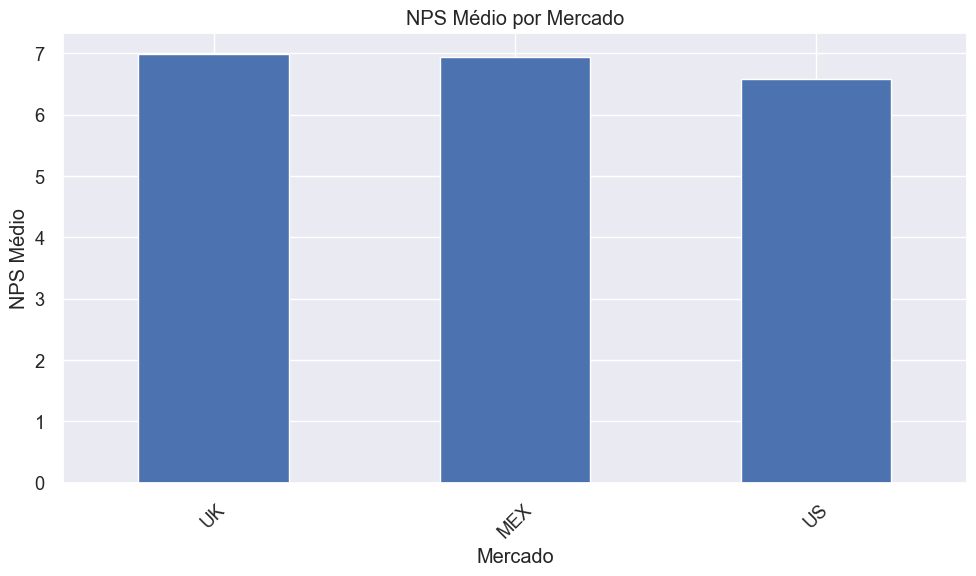

In [17]:
"""NPS médio por segmento de mercado:
Isso pode ajudar a identificar quais mercados estão performando melhor ou pior."""

market_nps = df.groupby('Market')['NPS'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
market_nps.plot(kind='bar')
plt.title('NPS Médio por Mercado')
plt.xlabel('Mercado')
plt.ylabel('NPS Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

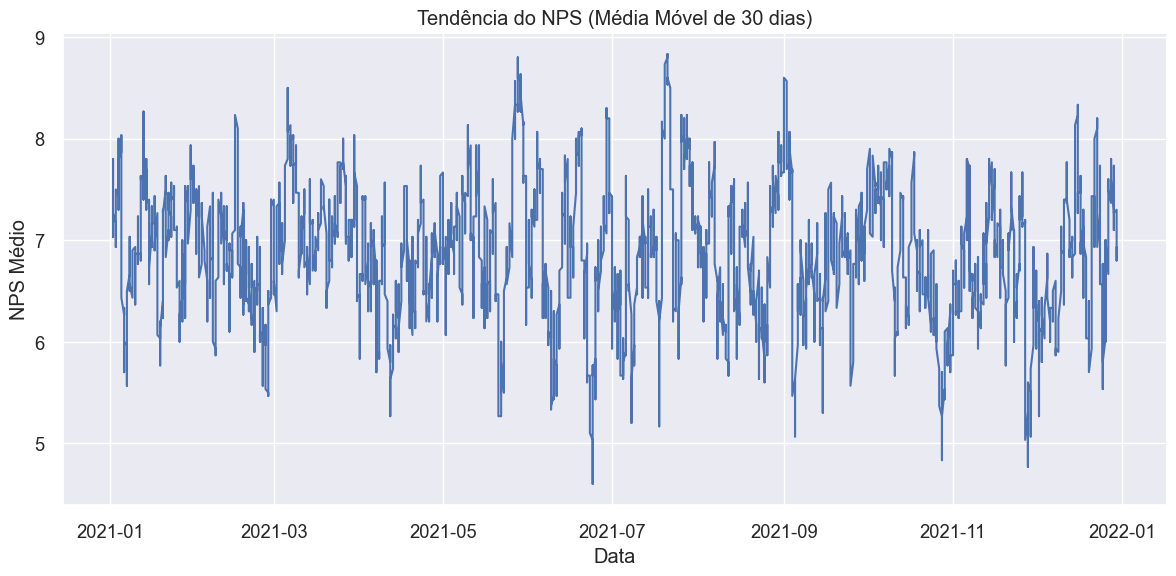

In [18]:
"""Evolução do NPS ao longo do tempo (tendência):
Uma linha simples mostrando a média móvel do NPS pode revelar tendências."""

df['NPS_MA'] = df['NPS'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Survey date'], df['NPS_MA'])
plt.title('Tendência do NPS (Média Móvel de 30 dias)')
plt.xlabel('Data')
plt.ylabel('NPS Médio')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

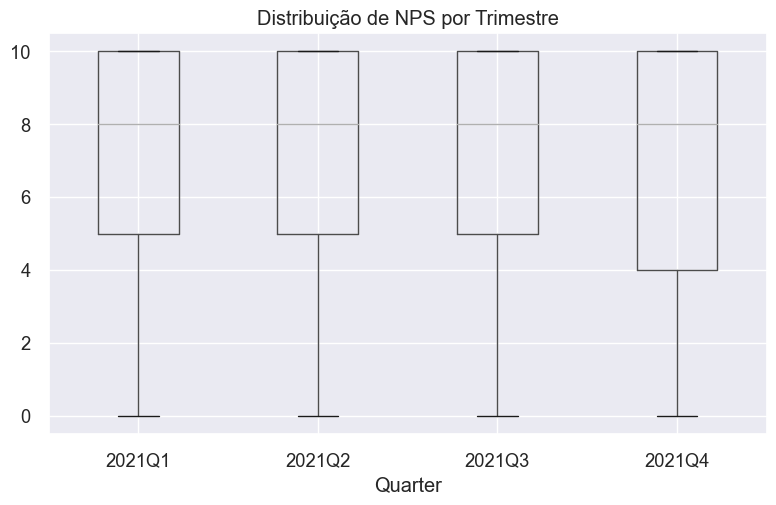

In [19]:
"""

Distribuição de NPS por trimestre:
Isso pode mostrar variações sazonais de forma mais agregada.

"""

df['Quarter'] = df['Survey date'].dt.to_period('Q')
plt.figure(figsize=(10, 6))
df.boxplot(column='NPS', by='Quarter')
plt.title('Distribuição de NPS por Trimestre')
plt.suptitle('')  # Remove o título automático
plt.tight_layout()
plt.show()

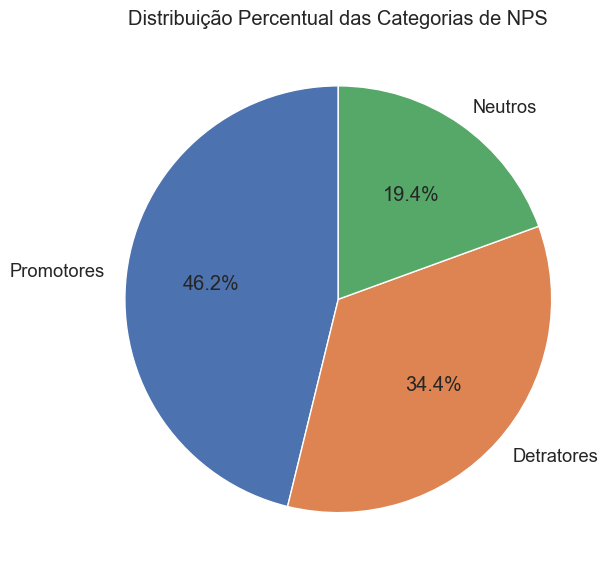

In [20]:
"""Percentual de respostas em cada categoria de NPS:
Uma visão rápida da proporção de detratores, neutros e promotores."""

nps_categories = df['NPS_Category'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
nps_categories.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição Percentual das Categorias de NPS')
plt.ylabel('')  # Remove o label do eixo y
plt.tight_layout()
plt.show()

In [21]:
"""Tabela resumo com estatísticas chave:
Um resumo simples com métricas importantes."""

summary = pd.DataFrame({
    'Métrica': ['NPS Médio', 'Mediana do NPS', 'Moda do NPS', 'Desvio Padrão do NPS', 
                '% Promotores', '% Neutros', '% Detratores'],
    'Valor': [df['NPS'].mean(), df['NPS'].median(), df['NPS'].mode().iloc[0], df['NPS'].std(),
              (df['NPS_Category'] == 'Promotores').mean() * 100,
              (df['NPS_Category'] == 'Neutros').mean() * 100,
              (df['NPS_Category'] == 'Detratores').mean() * 100]
})
print(summary.to_string(index=False))

             Métrica    Valor
           NPS Médio  6.84120
      Mediana do NPS  8.00000
         Moda do NPS 10.00000
Desvio Padrão do NPS  3.49228
        % Promotores 46.18000
           % Neutros 19.44000
        % Detratores 34.38000


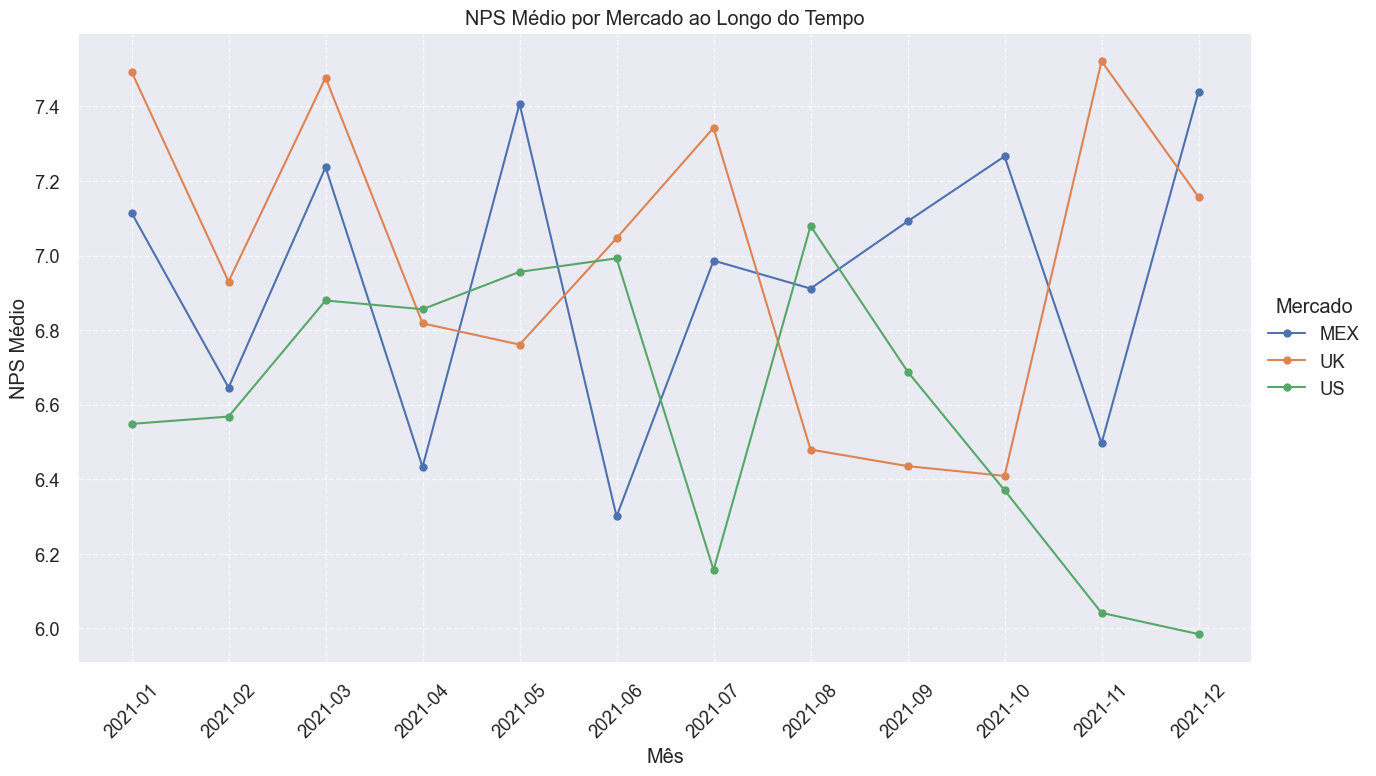


NPS Médio por Mercado no Primeiro Mês (2021-01):
Market
UK     7.493056
MEX    7.114504
US     6.548387
Name: 2021-01, dtype: float64

NPS Médio por Mercado no Último Mês (2021-12):
Market
MEX    7.439394
UK     7.157143
US     5.984375
Name: 2021-12, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a data para o formato mensal
df['Month'] = df['Survey date'].dt.to_period('M')

# Calcular o NPS médio por mercado e mês
nps_by_market_time = df.groupby(['Market', 'Month'])['NPS'].mean().unstack(level=0)

# Plotar o gráfico
plt.figure(figsize=(14, 8))
for market in nps_by_market_time.columns:
    plt.plot(nps_by_market_time.index.astype(str), nps_by_market_time[market], marker='o', label=market)

plt.title('NPS Médio por Mercado ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('NPS Médio')
plt.legend(title='Mercado', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprimir uma tabela com o NPS médio de cada mercado para o primeiro e último mês
first_month = nps_by_market_time.index[0]
last_month = nps_by_market_time.index[-1]

print(f"\nNPS Médio por Mercado no Primeiro Mês ({first_month}):")
print(nps_by_market_time.loc[first_month].sort_values(ascending=False))

print(f"\nNPS Médio por Mercado no Último Mês ({last_month}):")
print(nps_by_market_time.loc[last_month].sort_values(ascending=False))

In [33]:
import pandas as pd
import numpy as np

# Primeiro, vamos verificar a distribuição dos valores de NPS
print("Distribuição dos valores de NPS:")
print(df['NPS'].value_counts().sort_index())

# Vamos calcular manualmente as porcentagens de promotores e detratores
promoters = (df['NPS'] >= 9).mean() * 100
detractors = (df['NPS'] <= 6).mean() * 100

print(f"\nPorcentagem de Promotores: {promoters:.2f}%")
print(f"Porcentagem de Detratores: {detractors:.2f}%")

# Vamos verificar se há algum valor fora do intervalo esperado (0-10)
unexpected = df[~df['NPS'].between(0, 10)]
if not unexpected.empty:
    print("\nValores inesperados encontrados:")
    print(unexpected)
else:
    print("\nTodos os valores de NPS estão dentro do intervalo esperado (0-10)")

# Verificando a correlação entre NPS e NPS_Category
print("\nVerificando a consistência entre NPS e NPS_Category:")
inconsistent = df[(df['NPS'] >= 9) & (df['NPS_Category'] != 'Promotores') |
                  (df['NPS'].between(7, 8)) & (df['NPS_Category'] != 'Neutros') |
                  (df['NPS'] <= 6) & (df['NPS_Category'] != 'Detratores')]

if not inconsistent.empty:
    print("Encontradas inconsistências entre NPS e NPS_Category:")
    print(inconsistent)
else:
    print("NPS e NPS_Category são consistentes")

# Função para calcular o NPS (para referência)
def calculate_nps(scores):
    promoters = (scores >= 9).mean() * 100
    detractors = (scores <= 6).mean() * 100
    return promoters - detractors

Distribuição dos valores de NPS:
NPS
0      565
1      172
2      154
3      181
4      120
5      321
6      206
7      292
8      680
9      712
10    1597
Name: count, dtype: int64

Porcentagem de Promotores: 46.18%
Porcentagem de Detratores: 34.38%

Todos os valores de NPS estão dentro do intervalo esperado (0-10)

Verificando a consistência entre NPS e NPS_Category:
NPS e NPS_Category são consistentes
